<a href="https://colab.research.google.com/github/jov580/astro-vezbe/blob/main/Zakoni_zracenja_i_zvezde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

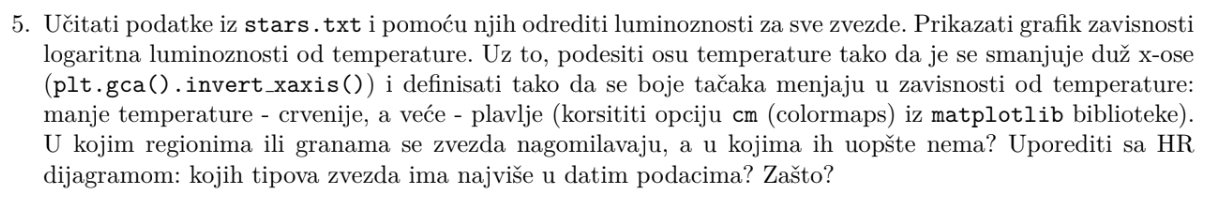

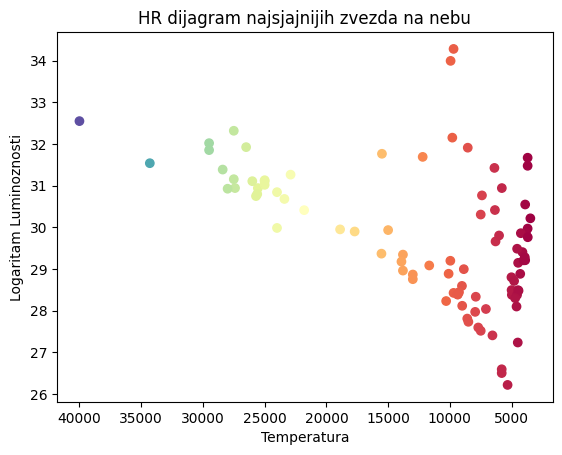

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from astropy import constants as const

sigma = const.sigma_sb.value

podaci = pd.read_csv('stars.txt', sep=' ', header=None, names=['ime_zvezde', 'poluprecnik', 'temperatura'], dtype={'poluprecnik': float, 'temperatura': float}, skiprows = 1)

luminoznost = []

for index, podatak in podaci.iterrows():
  luminoznost.append(4 * np.pi * (podatak['poluprecnik'] * 695500000) ** 2 * sigma * podatak['temperatura'] ** 4)

temperatura = podaci['temperatura']

log_luminoznost = np.log10(luminoznost)

colors = cm.Spectral((temperatura - min(temperatura)) / (max(temperatura) - min(temperatura)))

plt.figure()
plt.ylabel('Logaritam Luminoznosti')
plt.xlabel('Temperatura')
plt.title('HR dijagram najsjajnijih zvezda na nebu')
plt.gca().invert_xaxis()
plt.scatter(temperatura, log_luminoznost, c=temperatura, cmap="Spectral")
plt.show()
